In [6]:
# Imports and Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib notebook
full_df = pd.read_csv('../resources/passing.csv')

In [7]:
# Reformatting and Selecting Columns
full_df['Player'] = [player.split('\\')[0] for player in full_df['Player']]
data = full_df[['Player','Tm','Age','G','GS','QBrec','Cmp','Att',
               'Cmp%','Yds','TD','TD%','Int','Int%','1D','Lng',
               'Y/A','AY/A','Y/C','Y/G','Rate','QBR','Sk','Yds.1',
               'NY/A','ANY/A','Sk%','4QC','GWD']]
data = data.rename(columns={'QBrec':'Record',
                            'Yds.1':'SkYds'})
data = data.loc[(data['GS'] > (data['G'] / 2)) & data['Record']]
data = data.sort_values('Record', ascending=False).reset_index().drop(['index'], axis=1)
data.head()

,Player,Tm,Age,G,GS,Record,Cmp,Att,Cmp%,Yds,...,Y/G,Rate,QBR,Sk,SkYds,NY/A,ANY/A,Sk%,4QC,GWD
0,Justin Herbert*,LAC,23,17,17,9-8-0,443,672,65.9,5014,...,294.9,97.7,66.1,31,214,6.83,6.95,4.4,5.0,5.0
1,Carson Wentz,IND,29,17,17,9-8-0,322,516,62.4,3563,...,209.6,94.6,54.4,32,227,6.09,6.50,5.8,NaN,NaN
2,Ben Roethlisberger,PIT,39,16,16,9-7-0,390,605,64.5,3740,...,233.8,86.8,35.8,38,239,5.44,5.43,5.9,6.0,7.0
3,Jimmy Garoppolo,SFO,30,15,15,9-6-0,301,441,68.3,3810,...,254.0,98.7,52.6,29,201,7.68,7.38,6.2,3.0,3.0
4,Kyler Murray*,ARI,24,14,14,9-5-0,333,481,69.2,3787,...,270.5,100.6,56.8,31,286,6.84,6.90,6.1,1.0,1.0


In [8]:
# Creating Multiple DataFrames for Quick Analysis
basic = data[['Player','Record','Cmp','Att','Cmp%','Yds','TD','Int','1D','Lng','AY/A',
             'Rate','Sk','SkYds','GWD']]
# ratio = [list(basic['TD'])[x]/list(basic['Int'])[x] for x in list(range(len(tds)))]

In [9]:
sorted(basic.columns.tolist())

['1D',
 'AY/A',
 'Att',
 'Cmp',
 'Cmp%',
 'GWD',
 'Int',
 'Lng',
 'Player',
 'Rate',
 'Record',
 'Sk',
 'SkYds',
 'TD',
 'Yds']

<IPython.core.display.Javascript object>


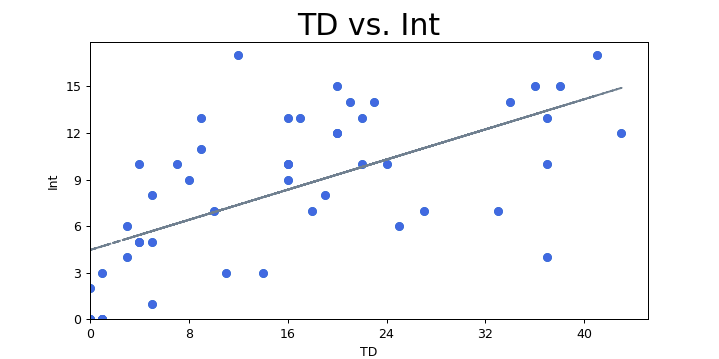

In [11]:
# Basic Graphing
x_column = 'TD'
y_column = 'Int'
tooltip_column = 'Player'

x = basic[x_column] 
y = basic[y_column]
tt = basic[tooltip_column]

plt.close('all')
fig, ax = plt.subplots(1, figsize=(8,4))
sc = ax.scatter(x, y)
plt.title(f'{x_column} vs. {y_column}', fontsize=24)
plt.xlabel(x_column)
plt.ylabel(y_column)

lnx = plt.plot([60, 60], [0, 1.5], color='black', linewidth=0.3)
lny = plt.plot([0, 100], [1.5, 1.5], color='black', linewidth=0.3)
lnx[0].set_linestyle('None')
lny[0].set_linestyle('None')

plt.xlim(x.min()*0.95, x.max()*1.05)
plt.ylim(y.min()*0.95, y.max()*1.05)

annot = ax.annotate('', xy=(0,0), xytext=(5,5), textcoords='offset points')
annot.set_visible(False)

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regression_line = slope * x + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
r = rvalue
r_squared = r*r

# Plotting 
plt.scatter(x, y,color='royalblue')
plt.plot(x, regression_line, "--", color='slategrey')

def hover(event):
    if event.inaxes == ax:
        lnx[0].set_data([event.xdata, event.xdata], [0, y.max() * 1.05])
        lnx[0].set_linestyle('--')
        lnx[0].set_visible(True)
        lny[0].set_data([0, x.max() * 1.05], [event.ydata, event.ydata])
        lny[0].set_linestyle('--')
        lny[0].set_visible(True)
        
        cont, ind = sc.contains(event)
        if cont:
            annot.xy = (event.xdata, event.ydata)
            annot.set_text('{}'.format(', '.join([tt[n] for n in ind['ind']])))
            annot.set_visible(True)
        else:
            annot.set_visible(False)
    else:
        lnx[0].set_visible(False)
        lny[0].set_visible(False)
    
fig.canvas.mpl_connect('motion_notify_event', hover)

xstep = int(math.ceil(x.max()) / 5)
ystep = int(math.ceil(y.max()) / 5)
plt.xticks(range(0, int(x.max()) + 1, xstep))
plt.yticks(range(0, int(y.max()) + 1, ystep))
plt.show()